In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import os
import matplotlib.pyplot as plt

print(tf.__version__)

0.11.0


In [2]:
df = pd.read_csv("../features/features_global.csv", sep=',', header=None, low_memory=False, na_values=['null'])

In [3]:
df.isnull().sum().sum()

1309

In [4]:
df.ix[:,0].value_counts()


blue      7037
purple    6696
Name: 0, dtype: int64

In [5]:
df = df.dropna()

In [6]:
no_nulls = df.apply(lambda row : 
          any([ e == ("null") for e in row ])
       , axis=1) 

In [7]:
no_nulls[212]

False

In [8]:
df.loc[[212]]

,0,1,2,3,4,5,6,7,8,9,...,162,163,164,165,166,167,168,169,170,171
212,purple,3032929911,0.428571,394.6168,1.923077,0.923077,2.785714,158538.61,21724.75,24917.357,...,30202.79,531.6316,5.447369,5.031579,0.363158,-0.242105,260.3158,413.18948,-8.278948,1.352633


In [9]:
no_nulls.shape

(13660,)

In [12]:
df = df[~no_nulls]
df = df.apply(pd.to_numeric, errors='ignore')

In [11]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,162,163,164,165,166,167,168,169,170,171
0,blue,2984814498,0.650000,423.95993,1.917431,0.917431,2.900000,133402.100,17926.000,16480.800,...,13711.350,114.10000,1.190000,1.685000,-0.402500,-0.352500,193.48500,332.70502,-10.030000,-7.407500
1,purple,3034035764,0.526316,402.25280,2.000000,1.000000,2.157895,137797.310,17697.053,17959.790,...,17441.264,302.21054,1.189474,1.642105,0.100000,-0.081579,200.77895,350.03687,4.418421,30.384210
2,purple,3036731710,0.409091,421.79210,2.215569,1.215569,3.636364,154794.270,23505.592,24949.682,...,29733.684,782.63160,0.326316,0.773684,-0.036842,-0.413158,223.42105,339.43683,-9.331579,-31.594736
3,purple,3018436026,0.473684,384.25073,1.917526,0.917526,2.368421,136257.270,17298.736,18882.053,...,14255.750,136.25000,0.235000,0.405000,-0.330000,-0.022500,165.56500,310.27000,0.042500,65.232500
4,blue,3026930091,0.478261,398.31564,2.887755,1.887755,4.173913,125274.305,17986.130,22280.957,...,16022.895,226.68420,7.163158,6.894737,0.857895,0.323684,288.94210,461.35263,24.378946,56.265793


In [12]:
df.shape

(13660, 172)

In [13]:
#df = df.replace(to_replace='null', value=0)
#df = df.replace(to_replace='infinity', value=0)

In [8]:
#Global constants
seed = 7875
validation_size = 750
feature_count = df.shape[1] - 2

#feed forward neural net
n_nodes_hl1 = 10
n_nodes_hl2 = 0
n_nodes_hl3 = 0

#cycles of feed forward + backprop on all K-folded samples
hm_epochs = 100

n_classes = 2

model_path = "./tmp2/model.ckpt"
save_dir = './tmp2/'

x = tf.placeholder('float', [None, feature_count], name = 'xa')
y = tf.placeholder('float', [None, n_classes], name='ya')


In [9]:
import pickle

X = np.asarray(df.ix[:,2:feature_count+2])
#standardize X
meanX = np.mean(X, axis = 0)
stdX = np.std(X, axis = 0)

f = open('mean.pckl', 'wb')
pickle.dump(meanX, f)
f.close()

f = open('std.pckl', 'wb')
pickle.dump(stdX, f)
f.close()

X = (X - meanX) / stdX

Y_1 = np.asarray(df.ix[:,0])
Y_1 = [int(y == "purple") for y in Y_1]
#one hot Y
Y = np.zeros(shape=(len(Y_1), n_classes))
Y[np.arange(len(Y_1)), Y_1] = 1
    
validation_features = X[:validation_size]
validation_labels = Y[:validation_size]

train_features = X[validation_size:]
train_labels = Y[validation_size:]

num_examples = train_features.shape[0]

In [6]:
X[0]

array([ 1.24703131,  0.9888994 , -0.59912964, -0.59912964, -0.18120426,
        0.01125692, -0.53031364, -1.39320454,  1.91667197,  1.13198314,
        1.72465006,  0.22949016,  1.24565447,  0.32468169,  1.25322655,
        0.08798453,  0.69866944,  0.38235789,  0.48143861, -0.74157547,
       -0.7437107 , -0.69746008,  0.0036327 , -1.18934097, -0.90145787,
        1.13095743,  0.38213535,  0.85862733,  0.14536275, -0.03538988,
        1.16917891,  1.03340136,  0.05996424, -0.03355849, -0.46649097,
        1.92553655, -0.44173466, -0.44173458, -0.19559078,  0.03289997,
       -0.20687248, -0.45879897, -0.86708177,  1.28428861,  2.29807628,
        2.07916927,  2.46650891,  1.52262927,  1.90637001,  1.01432382,
        1.36080622, -0.24914316,  0.67752766,  0.40618594,  0.40618593,
        0.20116494,  0.0038096 , -0.65786463,  0.57115301, -0.27490781,
       -0.62435267, -0.49101331,  0.12040947,  0.22569633,  2.13853125,
        1.12220977,  0.48247465,  0.61888688, -0.54501614,  0.64

In [10]:
def neural_network_model(data):
    
    dropout_prob = 0.5
    
    hidden_1_layer = {
        'weights': tf.Variable(tf.truncated_normal([feature_count, n_nodes_hl1], stddev=0.1, seed=seed), name="h1_weights"),
        'biases': tf.Variable(tf.constant(1.0, shape=[n_nodes_hl1]), name="h1_biases")
    }
    hidden_2_layer = {
        'weights': tf.Variable(tf.truncated_normal([n_nodes_hl1, n_nodes_hl2], stddev=0.1, seed=seed), name="h2_weights"),
        'biases': tf.Variable(tf.constant(1.0, shape=[n_nodes_hl2]), name="h2_biases")
    }

    hidden_3_layer = {
        'weights': tf.Variable(tf.truncated_normal([n_nodes_hl2, n_nodes_hl3], stddev=0.1, seed=seed), name="h3_weights"),
        'biases': tf.Variable(tf.constant(1.0, shape=[n_nodes_hl3]), name="h3_biases")
    }
    output_layer = {
        'weights': tf.Variable(tf.truncated_normal([n_nodes_hl1, n_classes], stddev=0.1, seed=seed), name="o_weights"),
        'biases': tf.Variable(tf.constant(1.0, shape=[n_classes]), name="o_biases")
    }

    l1 = tf.add(tf.matmul(data, hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu6(l1)

    l1_drop = tf.nn.dropout(l1, dropout_prob, seed=seed)


    l2 = tf.add(tf.matmul(l1_drop, hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu6(l2)

    l2_drop = tf.nn.dropout(l2, dropout_prob, seed=seed)

    l3 = tf.add(tf.matmul(l2, hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.sigmoid(l3)

    l3_drop = tf.nn.dropout(l3, dropout_prob, seed=seed)


    ret = [hidden_1_layer['weights'], hidden_1_layer['biases'], output_layer['weights'], output_layer['biases']]
    
    output = tf.matmul(l1_drop, output_layer['weights']) +  output_layer['biases']

    regularizers = (tf.nn.l2_loss(hidden_1_layer['weights']) + tf.nn.l2_loss(hidden_1_layer['biases']) +
                                tf.nn.l2_loss(output_layer['weights']) + tf.nn.l2_loss(output_layer['biases']))

    return output, regularizers, ret

In [11]:
def display_stat(x_range, trains, tests, vals, acc_0s, acc_1s):
    
    #plt.plot(x_range, trains,'-b', label='Training acc')
    #plt.plot(x_rang±ange, tests,'-y', label='Test acc')
    plt.plot(x_range, acc_0s,'-r', label='Acc Class 0')
    plt.plot(x_range, acc_1s,'-k', label='Acc Class 1')

    plt.legend(loc='lower right', frameon=False)
    plt.ylim(ymax = 1.1, ymin = 0.0)

    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()

In [12]:
def train_neural_network_CV(x, lambda_):
    
    vals = []
    trains = []
    tests = []
    x_range = []
    
    f1_vals = []
    
    acc_1s = []
    acc_0s = []
    
    prediction, regularizers, to_save = neural_network_model(x)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(prediction, y))
    #log_loss = tf.contrib.losses.log_loss(predictions=prediction, labels=y)

    #Eval this to get probability of [winning,losing]
    prob = tf.nn.softmax(prediction, name="prob")
    
    #learning rate can be passed
    optimizer = tf.train.AdamOptimizer(1e-4).minimize(cost + lambda_ * regularizers)
    
    #metrics
    correct_prediction = tf.equal(tf.argmax(prediction,1), tf.argmax(y,1))
    false_prediction = tf.logical_not(correct_prediction)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

    #use for f1 score if needed
    true_positives = tf.reduce_sum(tf.to_int32(tf.logical_and(correct_prediction, tf.equal(tf.argmax(tf.nn.softmax(y),1), True) )))
    false_positives = tf.reduce_sum(tf.to_int32(tf.logical_and(false_prediction, tf.equal(tf.argmax(tf.nn.softmax(y),1), True) )))
    true_negatives = tf.reduce_sum(tf.to_int32(tf.logical_and(correct_prediction, tf.equal(tf.argmax(tf.nn.softmax(y),1), False) )))
    false_negatives = tf.reduce_sum(tf.to_int32(tf.logical_and(false_prediction, tf.equal(tf.argmax(tf.nn.softmax(y),1), False) )))

    #acc for each class
    class_0 = tf.where(tf.equal(tf.argmax(y, 1), 0))
    class_0 = tf.reshape(class_0, [tf.shape(class_0)[0]])
    pred_0 = tf.gather(prediction, class_0)
    y_0 = tf.gather(y, class_0)
    class_0_correct = tf.equal(tf.argmax(pred_0,1), tf.argmax(y_0,1))
    acc_0 = tf.reduce_mean(tf.cast(class_0_correct, 'float'))
    
    class_1 = tf.where(tf.equal(tf.argmax(y, 1), 1))
    class_1 = tf.reshape(class_1, [tf.shape(class_1)[0]])
    pred_1 = tf.gather(prediction, class_1)
    y_1 = tf.gather(y, class_1)
    class_1_correct = tf.equal(tf.argmax(pred_1,1), tf.argmax(y_1,1))
    acc_1 = tf.reduce_mean(tf.cast(class_1_correct, 'float'))
    
    display_step = 1
    
    saver = tf.train.Saver(to_save)

    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())
        
        for epoch in range(hm_epochs):
            #epoch_loss = 0
            fold_index = 0
            
            kf = KFold(n_splits=5, random_state=seed, shuffle=True)
            for train_index, test_index in kf.split(train_features, train_labels):
                fold_index += 1
                X_train, X_test = train_features[train_index], train_features[test_index]
                y_train, y_test = train_labels[train_index], train_labels[test_index]
                
                _, c = sess.run([optimizer, cost], feed_dict = {x: X_train, y: y_train})
                #epoch_loss += c
                
                train_accuracy = accuracy.eval(feed_dict={ x: X_train, y: y_train})  
                test_accuracy = accuracy.eval(feed_dict={ x: X_test, y: y_test})  
                
                # increase display_step after 10 iteration of same decimal
                if epoch%(display_step*10) == 0 and epoch:
                       display_step *= 10
    
                if (epoch%display_step == 0 or (epoch+1) == hm_epochs) and fold_index == 5:
                    print('train:%.4f, test:%.4f,  epoch %d, fold %d' % (train_accuracy, test_accuracy, epoch, fold_index))

                    #if (fold_index == kf.n_splits):
                    validation_accuracy = accuracy.eval(feed_dict={ x: validation_features, y: validation_labels})
                    print ('val:%.2f' % (validation_accuracy))
                    
                    tp = true_positives.eval(feed_dict={ x: validation_features, y: validation_labels})   
                    fp = false_positives.eval(feed_dict={ x: validation_features, y: validation_labels})  
                    fn = false_negatives.eval(feed_dict={ x: validation_features, y: validation_labels})

                    precision = float(tp) / float(tp+fn + 0.0000000000001)
                    recall = float(tp) / float(tp + fn + 0.0000000000001)
                    F1_val = 2 * ( precision * recall ) / ( precision + recall + 0.0000000000001 )

                    x_range.append(epoch)
                    vals.append(validation_accuracy)
                    trains.append(train_accuracy)
                    tests.append(test_accuracy)
                    f1_vals.append(F1_val)
                    
                    #print(validation_labels)
                    #print(class_1.eval(feed_dict={ x: validation_features, y: validation_labels})  )

                    acc_1s.append(acc_1.eval(feed_dict={ x: validation_features, y: validation_labels}))
                    acc_0s.append(acc_0.eval(feed_dict={ x: validation_features, y: validation_labels}))
                    
        save_path = saver.save(sess, model_path)        
        
        display_stat(x_range, trains, tests, vals, acc_0s, acc_1s)


train:0.4888, test:0.5008,  epoch 0, fold 5
val:0.45
train:0.4843, test:0.4985,  epoch 1, fold 5
val:0.45
train:0.4859, test:0.4977,  epoch 2, fold 5
val:0.47
train:0.4908, test:0.5039,  epoch 3, fold 5
val:0.47
train:0.4901, test:0.4961,  epoch 4, fold 5
val:0.47
train:0.4860, test:0.4992,  epoch 5, fold 5
val:0.46
train:0.4890, test:0.4950,  epoch 6, fold 5
val:0.47
train:0.4857, test:0.4961,  epoch 7, fold 5
val:0.45
train:0.4847, test:0.4957,  epoch 8, fold 5
val:0.47
train:0.4902, test:0.5012,  epoch 9, fold 5
val:0.47
train:0.4902, test:0.4977,  epoch 10, fold 5
val:0.46
train:0.4926, test:0.4973,  epoch 20, fold 5
val:0.49
train:0.4953, test:0.5000,  epoch 30, fold 5
val:0.46
train:0.5009, test:0.5074,  epoch 40, fold 5
val:0.48
train:0.5063, test:0.5155,  epoch 50, fold 5
val:0.47
train:0.5118, test:0.5213,  epoch 60, fold 5
val:0.50
train:0.5228, test:0.5434,  epoch 70, fold 5
val:0.50
train:0.5331, test:0.5294,  epoch 80, fold 5
val:0.50
train:0.5303, test:0.5306,  epoch 90, 

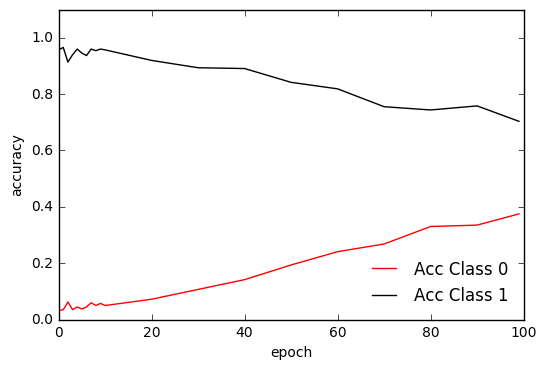

In [13]:
model_path = "./tmp2/model.ckpt"
save_dir = './tmp2/'
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)
    
    
L2_lambda_ = 1.5e-3
train_neural_network_CV(x, L2_lambda_)

In [16]:
# Running a new session to predict based on model
#TODO make sure it works and test
# prediction, regularizers, ret = neural_network_model(x)
#Eval this to get probability of [winning,losing]
# prob = tf.nn.softmax(prediction)

new_saver = tf.train.import_meta_graph(model_path + ".meta")

with tf.Session() as sess:
    # Initialize variables
#     sess.run(tf.global_variables_initializer())
    
#     saver.restore(sess, model_path)
    new_saver.restore(sess, './tmp2/model.ckpt')
    
#     #test random sample from validation test
    prob_test = X[20].reshape((1,validation_features[0].shape[0]))
#     prob_value = prob.eval(feed_dict={ x:prob_test})  
    prob_value = sess.run("prob:0", feed_dict={'xa:0':prob_test})
    print('probability test', prob_value)
    
    

InvalidArgumentError: You must feed a value for placeholder tensor 'x_1' with dtype float
	 [[Node: x_1 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'x_1', defined at:
  File "/Users/Marco/anaconda/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/Marco/anaconda/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/Marco/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/Marco/anaconda/lib/python3.5/site-packages/traitlets/config/application.py", line 653, in launch_instance
    app.start()
  File "/Users/Marco/anaconda/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/Users/Marco/anaconda/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/Users/Marco/anaconda/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/Users/Marco/anaconda/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/Marco/anaconda/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/Marco/anaconda/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/Marco/anaconda/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/Marco/anaconda/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/Marco/anaconda/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/Marco/anaconda/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/Marco/anaconda/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/Users/Marco/anaconda/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/Marco/anaconda/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/Marco/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/Marco/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/Marco/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-cd0f9d3a1ee2>", line 7, in <module>
    new_saver = tf.train.import_meta_graph(model_path + ".meta")
  File "/Users/Marco/anaconda/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1711, in import_meta_graph
    read_meta_graph_file(meta_graph_or_file), clear_devices)
  File "/Users/Marco/anaconda/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1598, in _import_meta_graph_def
    input_graph_def, name="", producer_op_list=producer_op_list)
  File "/Users/Marco/anaconda/lib/python3.5/site-packages/tensorflow/python/framework/importer.py", line 285, in import_graph_def
    op_def=op_def)
  File "/Users/Marco/anaconda/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2380, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/Marco/anaconda/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1298, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'x_1' with dtype float
	 [[Node: x_1 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [41]:
probability test [[ 0.35814959  0.64185047]]
In [41]:

X[0]

array([ 1.24703131,  0.9888994 , -0.59912964, -0.59912964, -0.18120426,
        0.01125692, -0.53031364, -1.39320454,  1.91667197,  1.13198314,
        1.72465006,  0.22949016,  1.24565447,  0.32468169,  1.25322655,
        0.08798453,  0.69866944,  0.38235789,  0.48143861, -0.74157547,
       -0.7437107 , -0.69746008,  0.0036327 , -1.18934097, -0.90145787,
        1.13095743,  0.38213535,  0.85862733,  0.14536275, -0.03538988,
        1.16917891,  1.03340136,  0.05996424, -0.03355849, -0.46649097,
        1.92553655, -0.44173466, -0.44173458, -0.19559078,  0.03289997,
       -0.20687248, -0.45879897, -0.86708177,  1.28428861,  2.29807628,
        2.07916927,  2.46650891,  1.52262927,  1.90637001,  1.01432382,
        1.36080622, -0.24914316,  0.67752766,  0.40618594,  0.40618593,
        0.20116494,  0.0038096 , -0.65786463,  0.57115301, -0.27490781,
       -0.62435267, -0.49101331,  0.12040947,  0.22569633,  2.13853125,
        1.12220977,  0.48247465,  0.61888688, -0.54501614,  0.64